<a href="https://colab.research.google.com/github/MattIzon/16010269_DataAnalytics/blob/main/DNN/Model5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN Model 5 No District Separation

Various Layer Configurations Attempted including:
*   58 -> 58 -> 1
*   58 -> 116 -> 1
*   58 -> 29 -> 1




Predictors Removed:
*   date
*   gust
*   hail
*   tornado_funnel_cloud




In [2]:
# Set-up
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

def normalise(df, column_list):
  # Normalises df columns in column_list returning a dictionary of column_name: (min_value, max_value) that can be used to recover the original values
  params = dict()

  for col in column_list:
    min = df[col].min()
    max = df[col].max()
    params[col] = (min, max)
    df[col] = (df[col] - min) / (max - min)

  return params


def normalise_w_params(df, params, column_list):
  # Normalises df columns using the provided params
  for col in column_list:
    min = params[col][0]
    max = params[col][1]
    df[col] = (df[col] - min) / (max - min)


def denormalise(df, params, column_list):
  # Uses the params dictionary produced during normalisation and a list of columns to recover their original values
  for col in column_list:
    min = params[col][0]
    max = params[col][1]
    df[col] = (df[col] * (max-min)) + min


def flat_list(nested_list):
  return [value for sublist in nested_list for value in sublist]

In [4]:
generic = pd.read_csv('https://raw.githubusercontent.com/MattIzon/16010269_DataAnalytics/main/DNN/DNN_day_generic_set.csv')

Model Specific Code goes here

In [5]:
norm = ['crime_count', 'temp', 'dewp', 'slp', 'stp', 'visib', 'wdsp', 'mxpsd', 'max', 'min', 'prcp', 'sndp', 'year']
data = generic.drop(['date', 'gust', 'hail', 'tornado_funnel_cloud'], axis=1)
scale_params = normalise(data, norm)

In [24]:
data.corr()['crime_count']

crime_count         1.000000
temp                0.716466
dewp                0.673355
slp                -0.273478
stp                 0.167965
visib               0.218860
wdsp               -0.229659
mxpsd              -0.146952
max                 0.710354
min                 0.698121
prcp                0.006629
sndp               -0.347028
fog                -0.092820
rain_drizzle        0.006766
snow_ice_pellets   -0.375700
thunder             0.132278
year               -0.048477
Fri                 0.170531
Mon                 0.009282
Sat                 0.031486
Sun                -0.062051
Thu                -0.034334
Tue                -0.071134
Wed                -0.044899
Apr                -0.093772
Aug                 0.277260
Dec                -0.164196
Feb                -0.298667
Jan                -0.222633
Jul                 0.269955
Jun                 0.242214
Mar                -0.201565
May                 0.145137
Nov                -0.141367
Oct           

In [6]:
# Seperate train / eval predictors / targets
qty_predictors = len(data.columns) - 1
qty_targets = 1
train_size = int(len(data)*0.8)

train_predictors = data.iloc[:train_size,1:]
train_targets = data.iloc[:train_size,0]

eval_predictors = data.iloc[train_size:,1:]
eval_targets = data.iloc[train_size:,0]

In [47]:
# Design model: layers ~ inputs(58) ->  h1(30) -> h2(15) -> outputs(1)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = (qty_predictors,)))
model.add(tf.keras.layers.Dense(29, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [17]:
# View model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                1080      
                                                                 
 dense_4 (Dense)             (None, 15)                465       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Train model
history = model.fit(train_predictors, train_targets, epochs=100)

Epoch 1/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0432
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0282
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0243
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0214
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 9/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 10/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 11/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 12/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 13/100
43/43 [=================

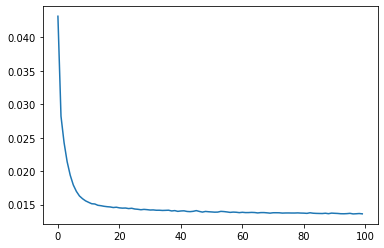

In [49]:
# View training history
plt.plot(history.history['loss'])

In [50]:
# Test model
eval_predictions = flat_list(model.predict(eval_predictors))

In [51]:
# Analyse model quality vs mean 
rmse = np.sqrt(np.mean((eval_targets.values - eval_predictions)**2))
print('LinearRegression has RMSE of {0}'.format(rmse));

avg = np.mean(train_targets)

rmse = np.sqrt(np.mean((eval_targets.values - avg)**2))
print('Using the training data mean of {0} would have has resulted in a RMSE of {1}'.format(avg, rmse));

LinearRegression has RMSE of 0.12035461594209336
Using the training data mean of 0.5124725877192983 would have has resulted in a RMSE of 0.18958985670076428


In [52]:
# Testing

test = pd.read_csv('https://raw.githubusercontent.com/MattIzon/16010269_DataAnalytics/main/DNN/DNN_day_test_set.csv')
test.drop(['date', 'gust', 'hail', 'tornado_funnel_cloud'], axis=1, inplace=True)
test_predictors = test.iloc[:,1:]
normalise_w_params(test_predictors, scale_params, norm[1:])

test_predictions = pd.DataFrame(flat_list(model.predict(test_predictors)), columns=['crime_count'])
denormalise(test_predictions, scale_params, ['crime_count'])
test_targets = test['crime_count']

results = pd.DataFrame()
results['predicted'] = test_predictions
results['actual'] = test_targets
results['error_squared'] = (results['predicted'] - results['actual']) ** 2
print(results)

print('The RMSE on the test values is {}.'.format(np.sqrt(np.mean(results.error_squared))))
print()

     predicted  actual  error_squared
0   655.180847     631     584.713370
1   677.989197     686      64.172968
2   832.458252     859     704.464389
3   677.837585     720    1777.669201
4   739.907410     745      25.934476
5   754.824524     791    1308.665069
6   776.118408     702    5493.538435
7   688.796143     726    1384.127007
8   713.410522     741     761.179271
9   621.445312     572    2444.838928
10  734.251221     720     203.097292
11  809.673889     826     266.541895
12  630.637207     640      87.661892
13  702.398682     713     112.387951
14  685.511475     717     991.527231
15  761.779175     751     116.190609
16  761.014038     707    2917.516310
The RMSE on the test values is 33.64540550340009.

